In [2]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [3]:
from IPython.display import display
pd.options.display.max_columns = None

In [4]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching

In [20]:
EXPERIMENT_NAME = 'game_results/r4'
KPIs = pd.read_csv('ExMAS/extras/{}_KPIs.csv'.format(EXPERIMENT_NAME), index_col = 0)
rides = pd.read_csv('ExMAS/extras/{}_rides.csv'.format(EXPERIMENT_NAME), index_col = 0)
rm = pd.read_csv('ExMAS/extras/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])

In [21]:
rm

ride  traveller  shared  degree  treq  ride_time   dist  ttrav  \
0    0       0          0   False       1     0        623   4989    623   
1    1       1          1   False       1     0        329   2639    329   
2    2       2          2   False       1     1        351   2810    351   
3    3       3          3   False       1     6        526   4211    526   
4    4       4          4   False       1     6        628   5029    628   
...        ...        ...     ...     ...   ...        ...    ...    ...   
1282 134  1282        134    True       5   203       1523   7834    979   
     143  1282        143    True       5   210       1523  10154   1269   
     178  1282        178    True       5   274       1523   8009   1001   
     121  1282        121    True       5   180       1523   4724    590   
     199  1282        199    True       5   326       1523   5587    698   

          ttrav_sh  delay  distance  cost_veh  cost_user  total_group_cost  \
0    0         623    0.0      4984   3.83465    2.18050           6.01515   
1    1         329    0.0      2632   2.49695    1.15150           3.64845   
2    2         351    0.0      2808   2.59705    1.22850           3.82555   
3    3         526    0.0      4208   3.39330    1.84100           5.23430   
4    4         628    0.0      5024   3.85740    2.19800           6.05540   
...            ...    ...       ...       ...        ...               ...   
1282 134      1110  -13.0     12184   7.92965    3.95325          33.21015   
     143      1475   28.0     12184   7.92965    5.30950          33.21015   
     178      1336  103.0     12184   7.92965    5.21675          33.21015   
     121      1105  266.0     12184   7.92965    5.26400          33.21015   
     199       997  390.0     12184   7.92965    5.53700          33.21015   

          cost_single  total_singles  residual_user  UNIFORM  desired_UNIFORM  \
0    0        6.01515        6.01515         0.0000  6.01515         4.513100   
1    1        3.64845        3.64845         0.0000  3.64845         3.648450   
2    2        3.82555        3.82555         0.0000  3.82555         3.825550   
3    3        5.23430        5.23430         0.0000  5.23430         3.658225   
4    4        6.05540        6.05540         0.0000  6.05540         3.922825   
...               ...            ...            ...      ...              ...   
1282 134      8.88095       41.52285        -8.3127  6.64203         5.854700   
     143     11.21545       41.52285        -8.3127  6.64203         6.642030   
     178      9.05805       41.52285        -8.3127  6.64203         6.058983   
     121      5.74950       41.52285        -8.3127  6.64203         5.118950   
     199      6.61890       41.52285        -8.3127  6.64203         4.741475   

          EXTERNALITY  desired_EXTERNALITY  RESIDUAL  desired_RESIDUAL  \
0    0        6.01515              5.12820  6.015150          5.471530   
1    1        3.64845              3.52940  3.648450          3.597309   
2    2        3.82555              3.82555  3.825550          3.825550   
3    3        5.23430              2.93685  5.234300          4.263986   
4    4        6.05540              4.03375  6.055400          4.875441   
...               ...                  ...       ...               ...   
1282 134      5.39000              4.35855  7.581048          6.423273   
     143         -inf                 -inf  9.469587          8.059273   
     178      6.31330              4.77505  7.342685          5.962968   
     121      6.25485              3.41775  4.018599          3.411522   
     199      6.49285              3.80205  4.798231          4.179456   

          SUBGROUP  desired_SUBGROUP  \
0    0    5.951950          5.951950   
1    1    3.648450          3.648450   
2    2    3.825550          3.825550   
3    3    5.035475          5.035475   
4    4    6.055400          6.055400   
...            ...               ...   
1282 134  6.819417

In [25]:
df

ride  traveller  shared  degree  treq  ride_time   dist  ttrav  \
0    0       0          0   False       1     0        623   4989    623   
1    1       1          1   False       1     0        329   2639    329   
2    2       2          2   False       1     1        351   2810    351   
3    3       3          3   False       1     6        526   4211    526   
4    4       4          4   False       1     6        628   5029    628   
...        ...        ...     ...     ...   ...        ...    ...    ...   
1282 134  1282        134    True       5   203       1523   7834    979   
     143  1282        143    True       5   210       1523  10154   1269   
     178  1282        178    True       5   274       1523   8009   1001   
     121  1282        121    True       5   180       1523   4724    590   
     199  1282        199    True       5   326       1523   5587    698   

          ttrav_sh  delay  distance  cost_veh  cost_user  total_group_cost  \
0    0         623    0.0     4.989   3.83465    2.18050           6.01515   
1    1         329    0.0     2.639   2.49695    1.15150           3.64845   
2    2         351    0.0     2.810   2.59705    1.22850           3.82555   
3    3         526    0.0     4.211   3.39330    1.84100           5.23430   
4    4         628    0.0     5.029   3.85740    2.19800           6.05540   
...            ...    ...       ...       ...        ...               ...   
1282 134      1110  -13.0     7.834   7.92965    3.95325          33.21015   
     143      1475   28.0    10.154   7.92965    5.30950          33.21015   
     178      1336  103.0     8.009   7.92965    5.21675          33.21015   
     121      1105  266.0     4.724   7.92965    5.26400          33.21015   
     199       997  390.0     5.587   7.92965    5.53700          33.21015   

          cost_single  total_singles  residual_user  UNIFORM  desired_UNIFORM  \
0    0        6.01515        6.01515         0.0000  6.01515         4.513100   
1    1        3.64845        3.64845         0.0000  3.64845         3.648450   
2    2        3.82555        3.82555         0.0000  3.82555         3.825550   
3    3        5.23430        5.23430         0.0000  5.23430         3.658225   
4    4        6.05540        6.05540         0.0000  6.05540         3.922825   
...               ...            ...            ...      ...              ...   
1282 134      8.88095       41.52285        -8.3127  6.64203         5.854700   
     143     11.21545       41.52285        -8.3127  6.64203         6.642030   
     178      9.05805       41.52285        -8.3127  6.64203         6.058983   
     121      5.74950       41.52285        -8.3127  6.64203         5.118950   
     199      6.61890       41.52285        -8.3127  6.64203         4.741475   

          EXTERNALITY  desired_EXTERNALITY  RESIDUAL  desired_RESIDUAL  \
0    0        6.01515              5.12820  6.015150          5.471530   
1    1        3.64845              3.52940  3.648450          3.597309   
2    2        3.82555              3.82555  3.825550          3.825550   
3    3        5.23430              2.93685  5.234300          4.263986   
4    4        6.05540              4.03375  6.055400          4.875441   
...               ...                  ...       ...               ...   
1282 134      5.39000              4.35855  7.581048          6.423273   
     143         -inf                 -inf  9.469587          8.059273   
     178      6.31330              4.77505  7.342685          5.962968   
     121      6.25485              3.41775  4.018599          3.411522   
     199      6.49285              3.80205  4.798231          4.179456   

          SUBGROUP  desired_SUBGROUP  \
0    0    5.951950          5.951950   
1    1    3.648450          3.648450   
2    2    3.825550          3.825550   
3    3    5.035475          5.035475   
4    4    6.055400          6.055400   
...            ...               ...   
1282 134  6.819417

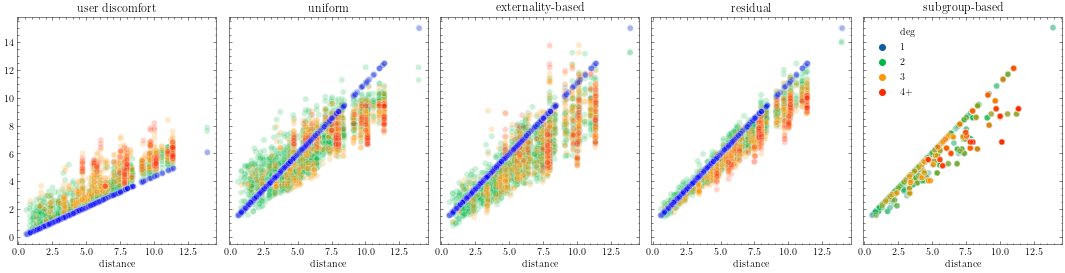

In [24]:
df = rm
palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
titles = ['user discomfort','uniform', 'externality-based','residual','subgroup-based']

fig, axes = plt.subplots(1,len(cols), figsize = (len(cols)*3,4), sharey=True)
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000

for i,col in enumerate(cols):
    
    
    axes[i].set_title(titles[i])
    sns.scatterplot(x='distance',y=col, data = df, ax = axes[i], hue = 'deg', alpha = 0.2, palette = palette)
    if col is not 'SUBGROUP':
        sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = axes[i], alpha = 0.2, color = 'blue')
    axes[i].set_ylabel('')
    if i<len(cols)-1:
        axes[i].get_legend().remove()
#plf.savefig('f3.png')
plt.tight_layout() 

In [36]:
rm.columns
"Experiment-r4_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['ExMAS']_minmax-min"


Index(['ride', 'traveller', 'shared', 'degree', 'treq', 'ride_time', 'dist',
       'ttrav', 'ttrav_sh', 'delay', 'distance', 'cost_veh', 'cost_user',
       'total_group_cost', 'cost_single', 'total_singles', 'residual_user',
       'UNIFORM', 'desired_UNIFORM', 'EXTERNALITY', 'desired_EXTERNALITY',
       'RESIDUAL', 'desired_RESIDUAL', 'SUBGROUP', 'desired_SUBGROUP',
       'Experiment-r4_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['EXMAS']_minmax-min',
       'Experiment-r4_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['EXMAS']_minmax-max',
       'Experiment-r4_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['TNE']_minmax-min',
       'Experiment-r4_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['TNE']_minmax-max',
       'Experiment-r4_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min',
       'Experiment-r4_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max',
       'Experiment-r4_Pri

user discomfort
user discomfort
user discomfort
user discomfort
user discomfort
user discomfort
UNIFORM
UNIFORM
UNIFORM
UNIFORM
UNIFORM
UNIFORM
EXTERNALITY
EXTERNALITY
EXTERNALITY
EXTERNALITY
EXTERNALITY
EXTERNALITY
RESIDUAL
RESIDUAL
RESIDUAL
RESIDUAL
RESIDUAL
RESIDUAL
SUBGROUP
SUBGROUP
SUBGROUP
SUBGROUP
SUBGROUP
SUBGROUP


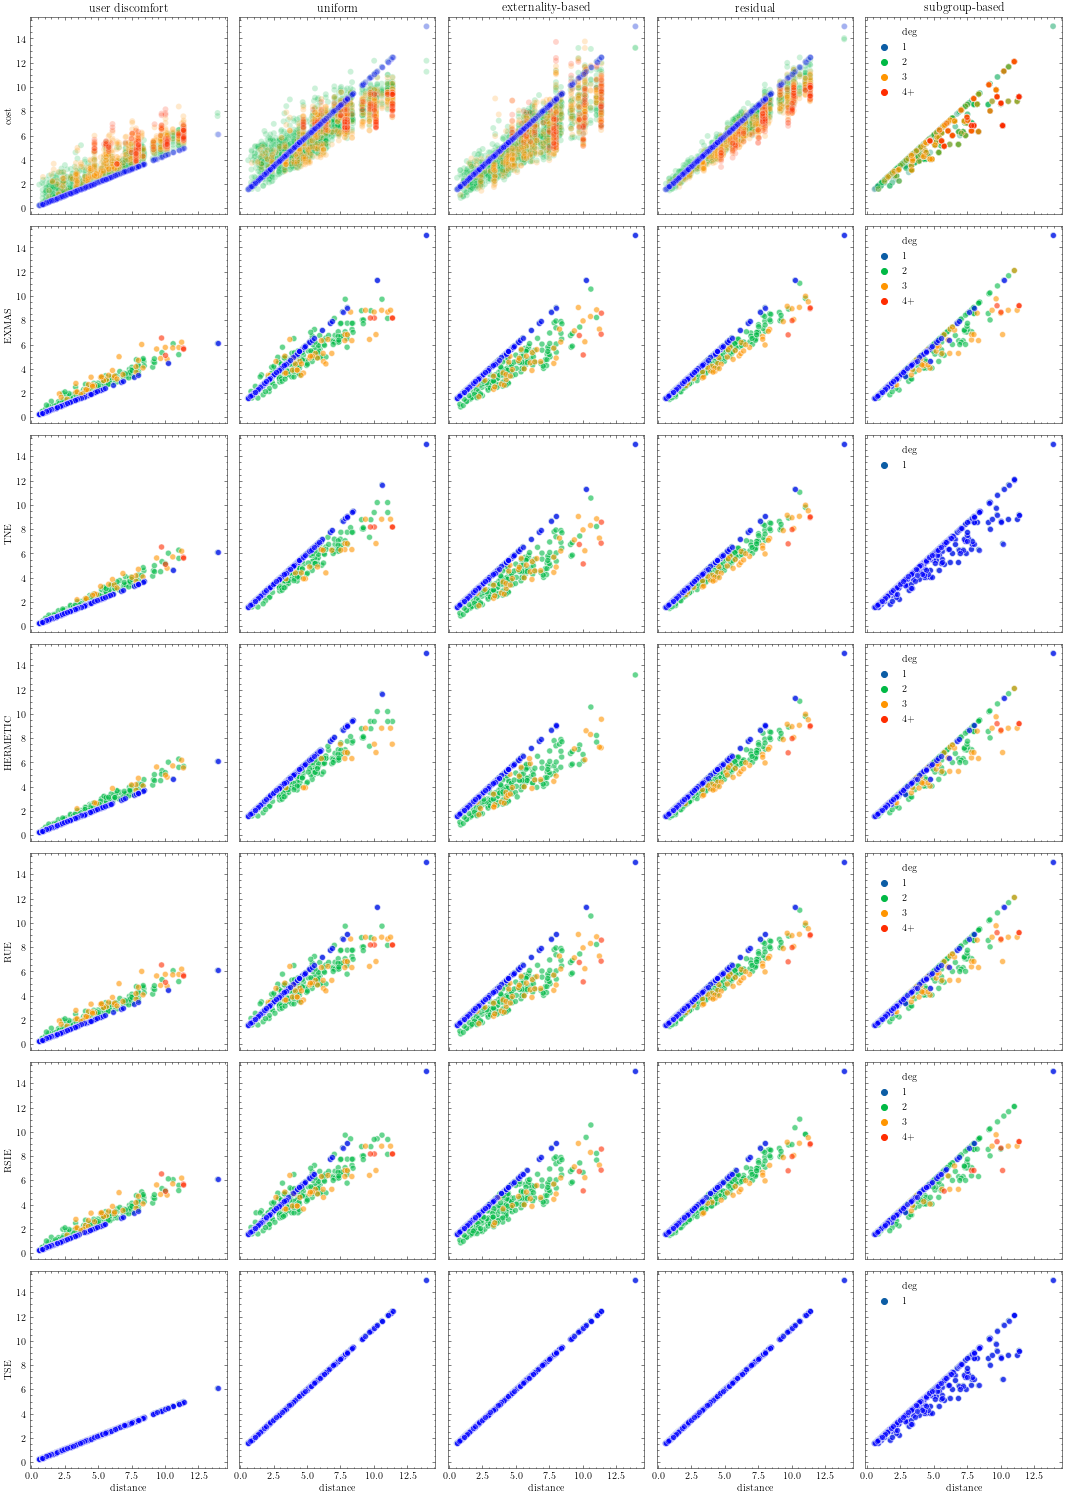

In [54]:
df = rm
palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
titles = ['user discomfort','uniform', 'externality-based','residual','subgroup-based']

fig, axes = plt.subplots(7,len(cols), figsize = (len(cols)*3,3*7), sharey=True, sharex = True)
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000

for i,col in enumerate(cols):
    
    
    axes[0][i].set_title(titles[i])
    sns.scatterplot(x='distance',y=col, data = df, ax = axes[0][i], hue = 'deg', alpha = 0.2, palette = palette)
    if col is not 'SUBGROUP':
        sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = axes[0][i], alpha = 0.2, color = 'blue')
    
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
                    
        filter_column = "Experiment-r4_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format('UNIFORM' if col == 'user discomfort' else col,ALGO)
        pal = sns.color_palette(colors[0:df[df[filter_column]==1].degree.nunique()])
        sns.scatterplot(x='distance',y=col, data = df[df[filter_column]==1], ax = axes[j+1][i], hue = 'deg', alpha = 0.6, palette = pal)
        sns.scatterplot(x='distance',y=col, data = df[(df.degree==1) & (df[filter_column]==1)], ax = axes[j+1][i], alpha = 0.6, color = 'blue')
        if i<len(cols)-1:
            axes[j+1][i].get_legend().remove()
        
        axes[j+1][0].set_ylabel(ALGO)
        
        

    
    
    if i>0:
        axes[0][i].set_ylabel('')
    else:
        axes[0][i].set_ylabel('cost')
        
    if i<len(cols)-1:
        axes[0][i].get_legend().remove()
#plf.savefig('f3.png')
plt.tight_layout() 

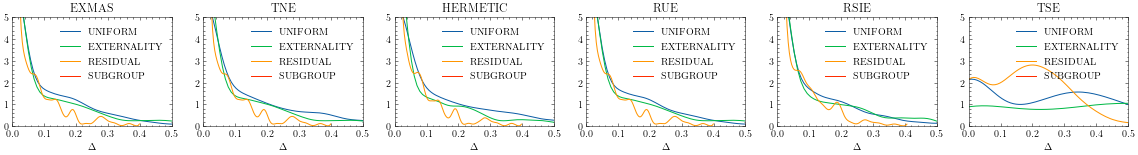

In [13]:
EXPERIMENT_NAME = 'r4'
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
fig, axes = plt.subplots(1,6, figsize = (20,2))
j=-1
for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        
        col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)
        
        rm['bestpossible_{}_{}'.format(PRICING,ALGO)] = rm.apply(lambda r: rm[(rm.traveller == r.traveller) & (rm[col] == 1)][PRICING].min(), axis=1)
        to_plot = rm[rm[col] == 1]
        
        to_plot['$\Delta$']=(to_plot[PRICING]-to_plot['desired_{}'.format(PRICING)])/to_plot['desired_{}'.format(PRICING)]
        sns.distplot(to_plot['$\Delta$'],ax = axes[j], kde = True, hist = False, label = PRICING) 
        axes[j].set_xlim((0,0.5))
        axes[j].set_title(ALGO)
        axes[j].set_ylim((0,5))
axes[-1].legend()
plt.savefig('hist.png', dpi = 600)

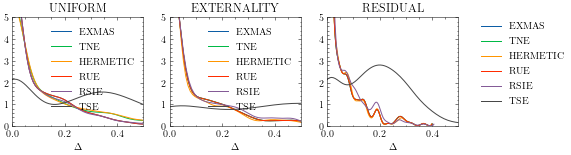

In [12]:
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL']
fig, axes = plt.subplots(1,3, figsize = (8,2))
j=-1
for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        
        col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)
        to_plot = rm[rm[col] == 1]
        to_plot['$\Delta$']=(to_plot[PRICING]-to_plot['desired_{}'.format(PRICING)])/to_plot['desired_{}'.format(PRICING)]
        sns.distplot(to_plot['$\Delta$'],ax = axes[i], kde = True, hist = False, label = ALGO) 
        axes[i].set_xlim((0,0.5))
        axes[i].set_title(PRICING)
        axes[i].set_ylim((0,5))
axes[-1].legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('hist2.png', dpi = 600)

In [144]:
KPIs['pricing'] = KPIs.apply(lambda x: x.name.split("_")[1].split("-")[1],axis =1)
KPIs['$T_i$'] = KPIs['PassHourTrav']/3600
KPIs['$T_G$'] = KPIs['VehHourTrav']/3600
#KPIs['prun'] = KPIs.apply(lambda x: x.algo[2:-2] if "[" in x.algo else x.algo,axis =1)
#KPIs['prun'] = KPIs.apply(lambda x: 'EXMAS' if len(x.prun) == 0 else x.prun,axis =1)
KPIs['$C$'] = KPIs['cost_user']

<AxesSubplot:xlabel='algo', ylabel='$T_i$'>

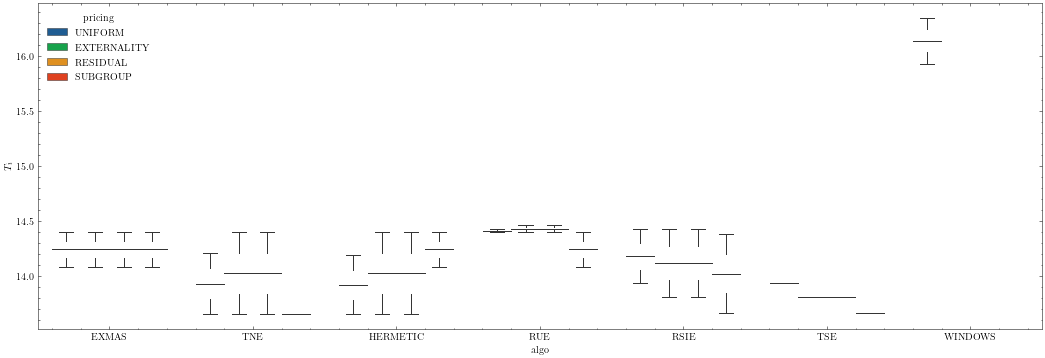

In [112]:
fig, axes = plt.subplots(figsize = (18,6))
flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none')
sns.boxplot(y = '$T_i$', x = 'algo', hue = 'pricing', data = KPIs,linewidth = 1,  showfliers=True, ax = axes, boxprops=dict(alpha=.0), whis = [0,100])

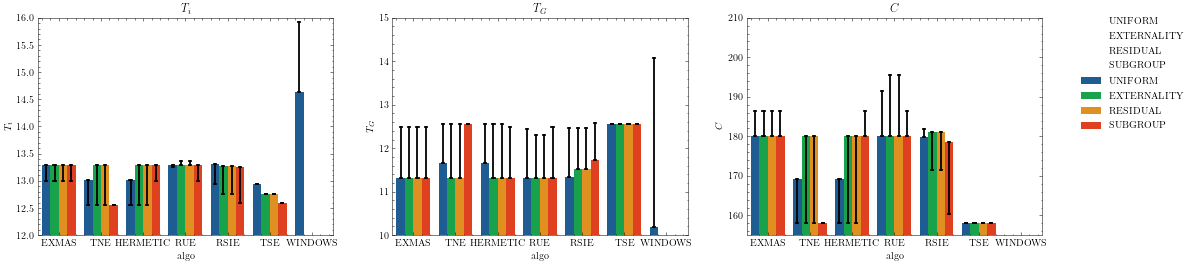

In [147]:
fig, axes = plt.subplots(1,3, figsize = (18,4))
for i, KPI in enumerate(['$T_i$','$T_G$', '$C$']):
    sns.barplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs, alpha = 0, ci = 100, capsize = 0.05, ax = axes[i], errcolor = 'black')
    sns.barplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs[KPIs.minmax == 'min'], alpha = 1, ci = 100, capsize = 0.05, ax = axes[i])
    if i==2:
        _ = axes[i].legend(bbox_to_anchor=(1.1, 1.05))
    else:
        axes[i].get_legend().remove()
    axes[i].set_title(KPI)
axes[0].set_ylim((12,16))
axes[1].set_ylim((10,15))
axes[2].set_ylim((155,210))



#connector, caplines, (vertical_lines,) = container.errorbar.lines
#vertical_lines.set_color(colors)
plt.savefig('bars.png',dpi=600)

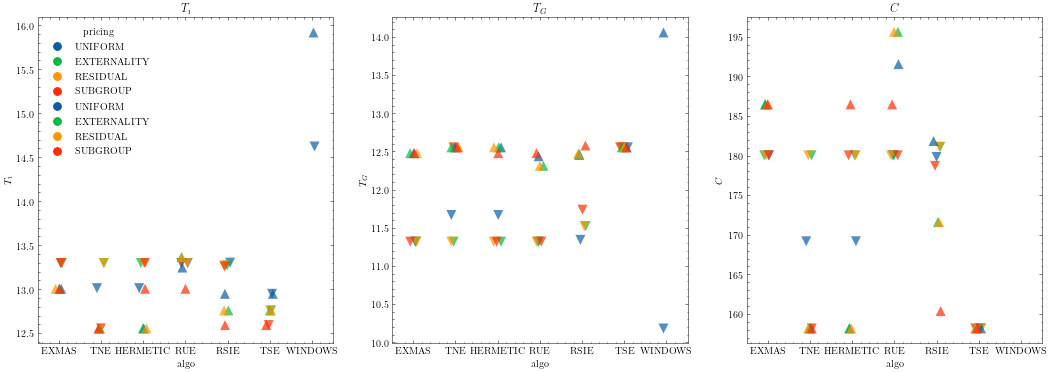

In [148]:
fig, axes = plt.subplots(1,3, figsize = (18,6))
for i, KPI in enumerate(['$T_i$','$T_G$', '$C$']):
    sns.stripplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs[KPIs.minmax == 'min'], ax = axes[i], marker = 'v', s= 10, alpha = 0.7)
    if i==0:
        _ = axes[i].legend(bbox_to_anchor=(1.1, 1.05))
    else:
        axes[i].get_legend().remove()
    sns.stripplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs[KPIs.minmax == 'max'], ax = axes[i], marker = '^', s=10,  alpha = 0.7)
    if i != 0: 
        axes[i].get_legend().remove()
    axes[i].set_title(KPI)
plt.savefig('dots.png',dpi=600)

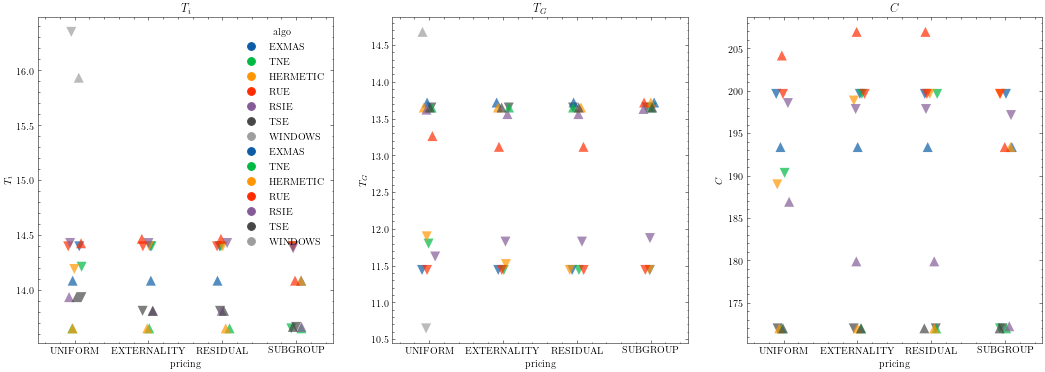

In [109]:
fig, axes = plt.subplots(1,3, figsize = (18,6))
for i, KPI in enumerate(['$T_i$','$T_G$', '$C$']):
    sns.stripplot(y = KPI, x = 'pricing', hue = 'algo', data = KPIs[KPIs.minmax == 'min'], ax = axes[i], marker = 'v', s= 10, alpha = 0.7)
    if i==0:
        _ = axes[i].legend(bbox_to_anchor=(1.1, 1.05))
    else:
        axes[i].get_legend().remove()
    sns.stripplot(y = KPI, x = 'pricing', hue = 'algo', data = KPIs[KPIs.minmax == 'max'], ax = axes[i], marker = '^', s=10,  alpha = 0.7)
    if i != 0: 
        axes[i].get_legend().remove()
    axes[i].set_title(KPI)


---
(c) Rafał Kucharski, Delft, 2020